enter:1
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:1
[[[ 1.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  1.]]]


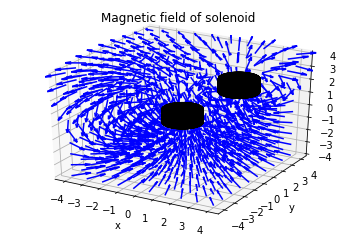

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad


#建立座標軸
L_axis = 4                #座標軸的範圍
spacing = 10              #座標間距

x = np.linspace(-L_axis,L_axis,spacing)
y = np.linspace(-L_axis,L_axis,spacing)
z = np.linspace(-L_axis,L_axis,spacing)

x,y,z = np.meshgrid(x,y,z)

#建立螺線管
half_L = 0.5              #螺線管長度的一半
N = 100                   #單位長度的匝數
r = 1                     #螺線管半徑                           
mu = 1.26 * 10**(-6)      #磁導率

def cylinder(r,m,n,l):   #m,n是導線的位置
    phi = np.linspace(-2*np.pi,2*np.pi,100)
    xp = m + r*np.cos(phi)
    yp = n + r*np.sin(phi)
    zp = l + np.linspace(-half_L,half_L,N)
    return xp, yp, zp
    
# 3d figure
fig = plt.figure()
ax = fig.gca(projection='3d')

#使用者輸入
n = 3
position = np.zeros([n, n, n]) # ([row, col])  #使用者輸入
for i in range(0,n):
    for j in range(0,n):
        for k in range(0,n):
            position[i][j][k]= input("enter:")
            current = position[i][j][k]        #電流
print(position)


#算出一小段螺線管造成的磁場
def dB(x, y, z, theta, zp, m, n, l):
    
    dbx = mu*current*r/4/np.pi*(z-zp)*np.cos(theta)/((x-m)**2+(y-n)**2+(z-zp)**2+r**2-2*r*((x-m)*np.cos(theta)+(y-n)*np.sin(theta)))**1.5

    dby = mu*current*r/4/np.pi*(z-zp)*np.sin(theta)/((x-m)**2+(y-n)**2+(z-zp)**2+r**2-2*r*((x-m)*np.cos(theta)+(y-n)*np.sin(theta)))**1.5

    dbz = mu*current*r/4/np.pi*(1 - ((x-m)*np.cos(theta)+(y-n)*np.sin(theta)))/((x-m)**2+(y-n)**2+(z-zp)**2+r**2-2*r*((x-m)*np.cos(theta)+(y-n)*np.sin(theta)))**1.5
    
    return dbx, dby, dbz
    
#將每一段螺線管的貢獻加總 

theta = np.linspace(0,2*np.pi,100)                #以theta描述螺線管每一段的位置


bx = np.zeros((spacing,spacing,spacing))          
by = np.zeros((spacing,spacing,spacing))
bz = np.zeros((spacing,spacing,spacing))


for i in range(0,n):
    for j in range(0,n):
        for k in range(0,n):
            cx,cy,cz = cylinder(1,i,j,k)         #cz代表每個環的位置
            for p in cz:
                for t in theta:
                    if position[i][j][k]==0:
                        continue
                    bx += dB(x, y, z, t, p, i, j, k)[0]
                    by += dB(x, y, z, t, p, i, j, k)[1]
                    bz += dB(x, y, z, t, p, i, j, k)[2]


# Plot of the 3d vector field
ax.quiver(x,y,z,bx,by,bz,color='b',length=1,normalize=True)
                                                    

#Plot the wire
for i in range(0,n):
    for j in range(0,n):
        for k in range(0,n):
            if position[i][j][k]==0:
                continue
            cx,cy,cz = cylinder(1,i,j,k)
            for l in cz:         
                ax.plot(cx,cy,l,color='k')

                
plt.title('Magnetic field of solenoid')
plt.xlabel('x')
plt.ylabel('y')
plt.figure(figsize=(400,200))
plt.show()                